In [115]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import AdvancedBraggEdgeFitting_v2
from PIL import Image

import tifffile
from tifffile import TiffFile

from skimage import io

import os, fnmatch
from os import listdir

from TOF_routines import tof2l
from TOF_routines import find_nearest

from astropy.io import fits
%matplotlib notebook

In [116]:
pathdata = '/media/carminati_c/Data2/LSP_Manuel/sample_binned_spotCleaned/'
pathob = '/media/carminati_c/Data2/LSP_Manuel/OB_binned_spotCleaned/'
files_sample = (sorted(fnmatch.filter(listdir(pathdata),'*.tif')))
files_ob = (sorted(fnmatch.filter(listdir(pathob),'*.tif')))
spectrum = np.loadtxt('/media/ws_niag/10_people/Morgano/RADEN_data_analysis/TEST6_000_Spectra.txt', usecols=0)

In [117]:
spectrum_binned = spectrum[0::18]
print(len(spectrum_binned))

t0=-0.0002618673892937752 
L=18.961609065251505
mylambda_bin = tof2l(spectrum_binned, 0,t0,L)

156


In [118]:
(pathob+files_ob[0])

ob = io.imread(pathob+files_ob[0])
np.shape(ob)

ob_image = np.zeros([300,400,155])
sample_image = np.zeros([300,400,155])
np.shape(ob_image)

for i in range(0,155):
    ob_image[:,:,i] = io.imread(pathob+files_ob[i])
    sample_image[:,:,i] = io.imread(pathdata+files_sample[i])

<IPython.core.display.Javascript object>


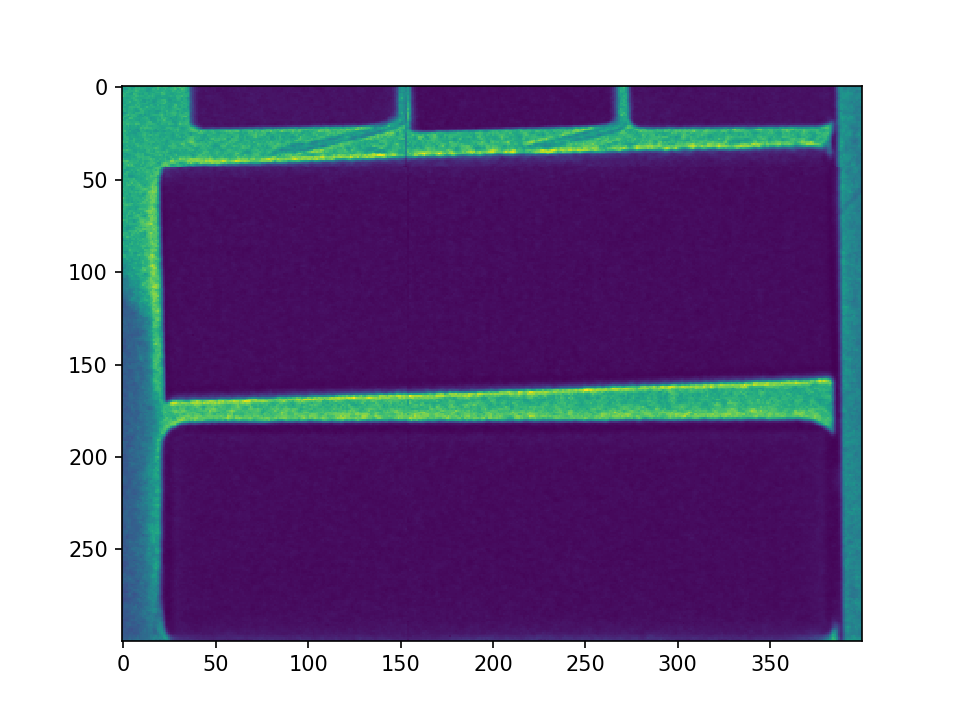

In [119]:
plt.figure()
plt.imshow(sample_image[:,:,i]/ob_image[:,:,i])

trans_image = np.zeros([300,400,155])
for i in range(0,155):
    dose = np.median(ob_image[10:20,10:20,i])/np.median(sample_image[10:20,10:20,i])
    trans_image[:,:,i] = sample_image[:,:,i]/ob_image[:,:,i]*dose

<IPython.core.display.Javascript object>


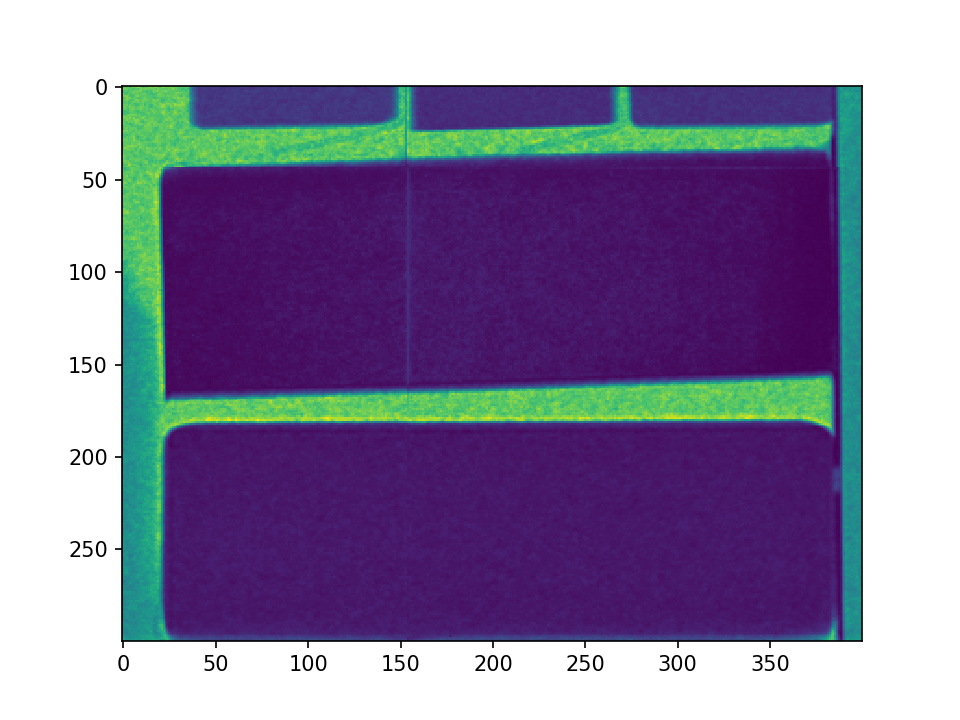

In [120]:
plt.figure()
plt.imshow(trans_image[:,:,70])

In [121]:
sp=np.zeros(156)
for i in range(0,155):
    sp[i] = np.median(trans_image[37,254,i])

<IPython.core.display.Javascript object>


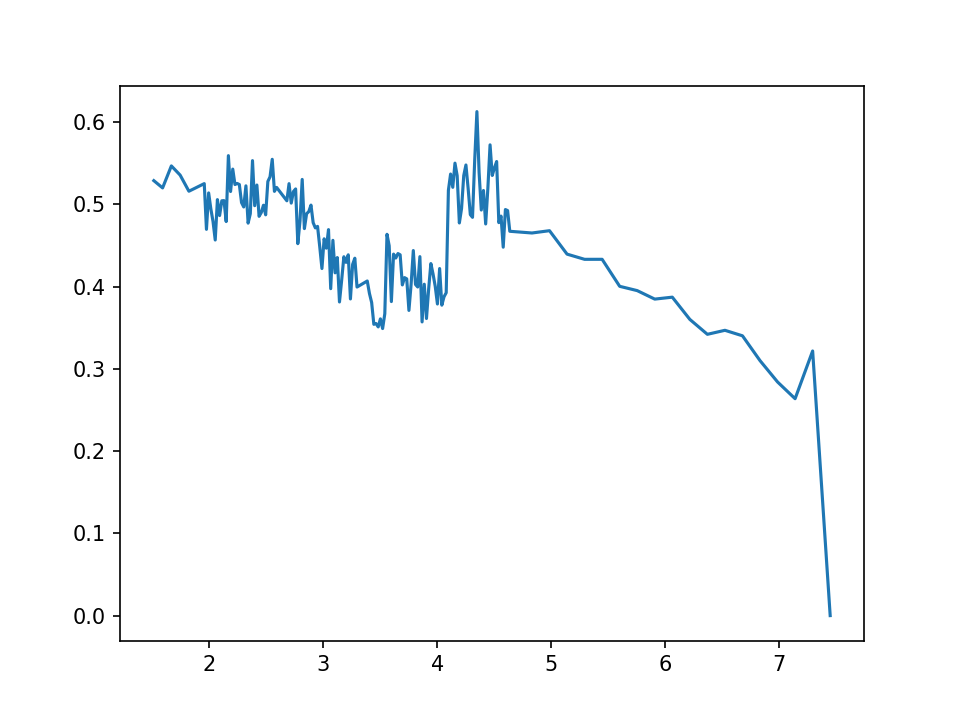

In [122]:
plt.figure()
plt.plot(mylambda_bin, sp)

[88, 125]


<IPython.core.display.Javascript object>


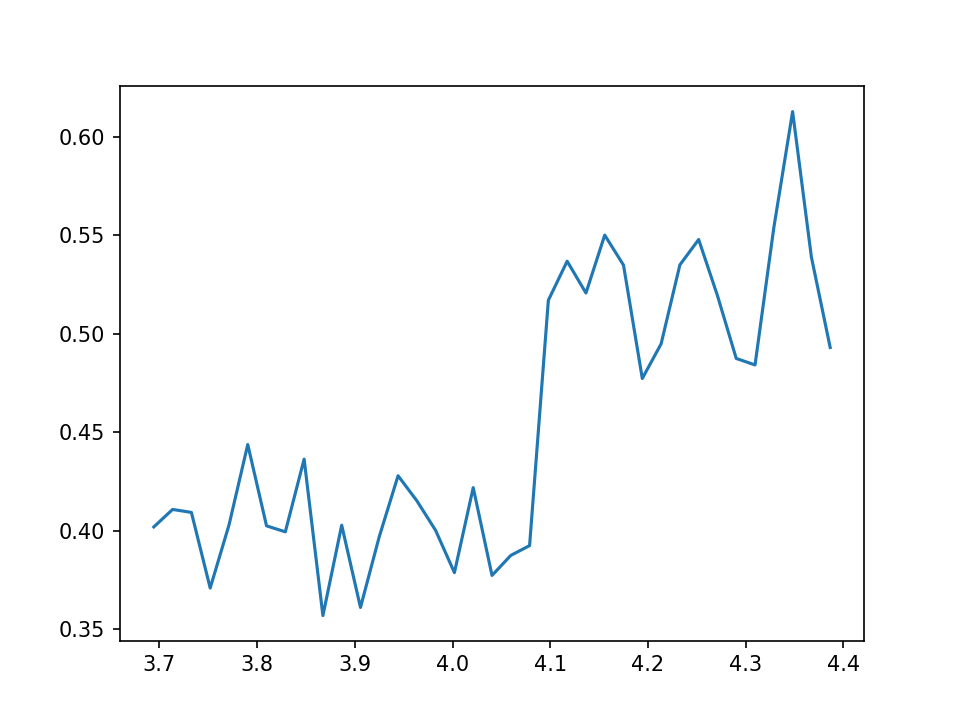

106


<IPython.core.display.Javascript object>


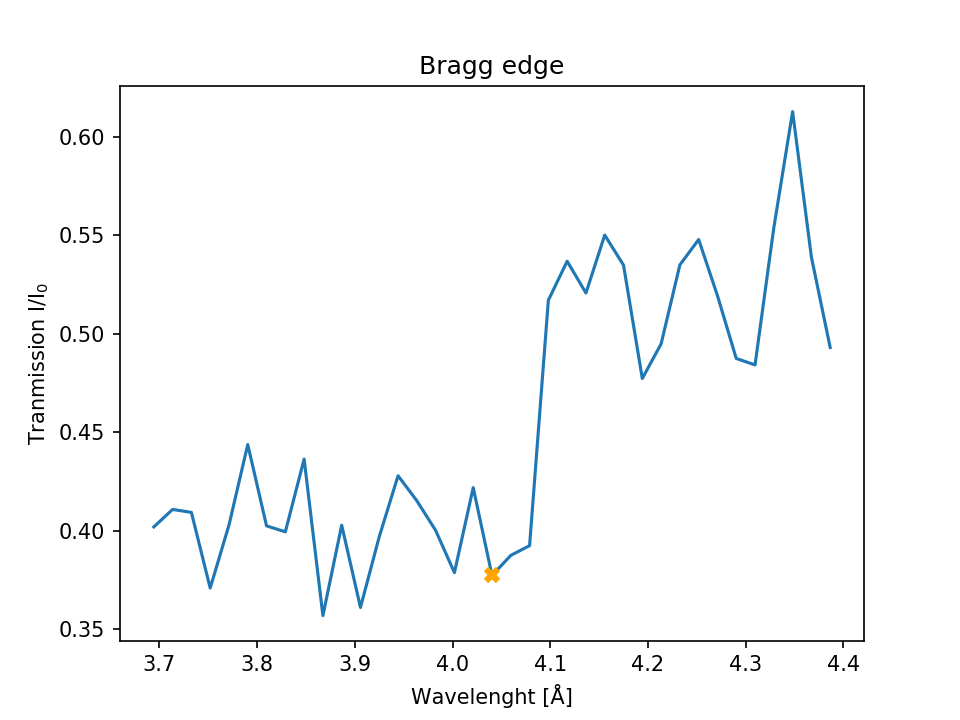

<IPython.core.display.Javascript object>


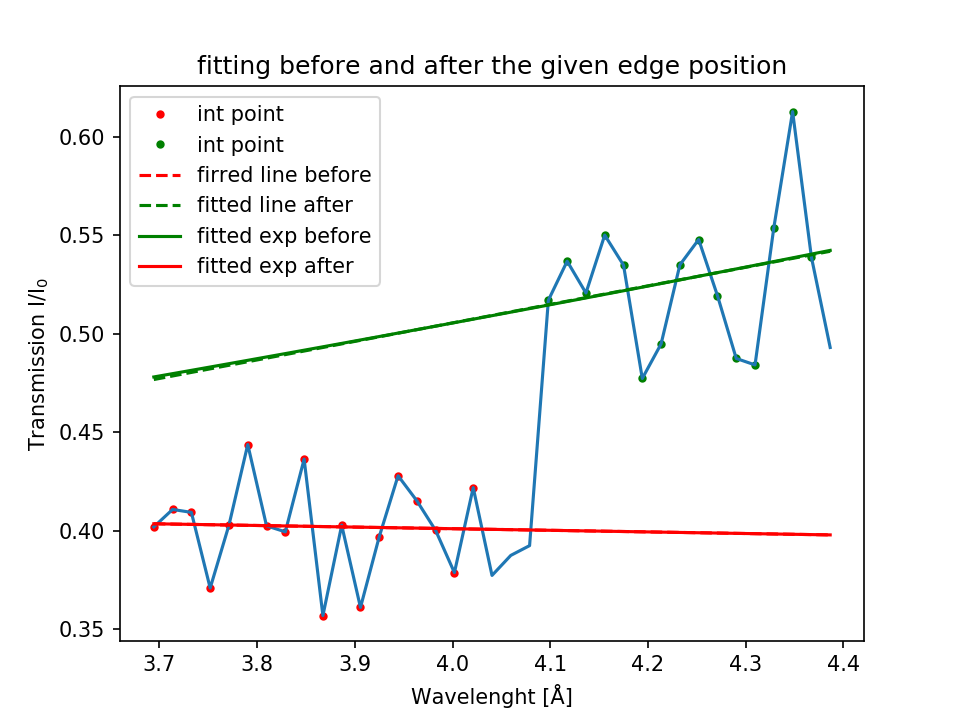

<IPython.core.display.Javascript object>


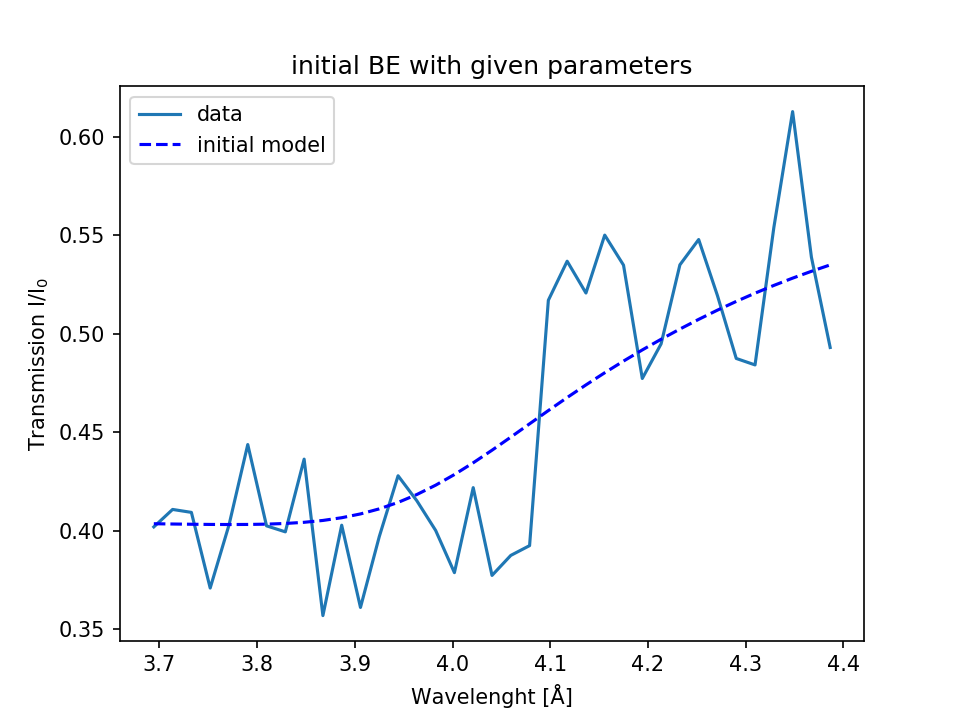

[[Model]]
    Model(BraggEdgeExponential)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 4
    # data points      = 37
    # variables        = 7
    chi-square         = 0.02742228
    reduced chi-square = 9.1408e-04
    Akaike info crit   = -252.670739
    Bayesian info crit = -241.394313
[[Variables]]
    t0:                 4.09282713 +/- 602559.332 (14722325.49%) (init = 4.093125)
    alpha:              7.3890e-04 +/- 3228849.50 (436981321419.55%) (init = 0.0007488532)
    sigma:              0.00273392 +/- 118009.724 (4316499144.20%) (init = 0.002865916)
    a1:                 0.92010203 +/- 0.91600450 (99.55%) (init = 0.8397586)
    a2:                -0.06520309 +/- 0.21456951 (329.08%) (init = -0.04650504)
    a5:                -0.33405704 +/- 1.08988269 (326.26%) (init = -0.2665501)
    a6:                 0.15023923 +/- 0.26315479 (175.16%) (init = 0.1349086)
    bool_transmission: -inf (fixed)
[[Correlations]] (unreported correlations 

/home/carminati_c/git/scripts/python/ToF_notebooks/AdvancedBraggEdgeFitting_v2.py:61: RuntimeWarning: invalid value encountered in multiply
  edge = 0.5*(term3(t,t0,sigma) - term4(t,t0,alpha,sigma)* term5(t,t0,alpha,sigma))


<IPython.core.display.Javascript object>


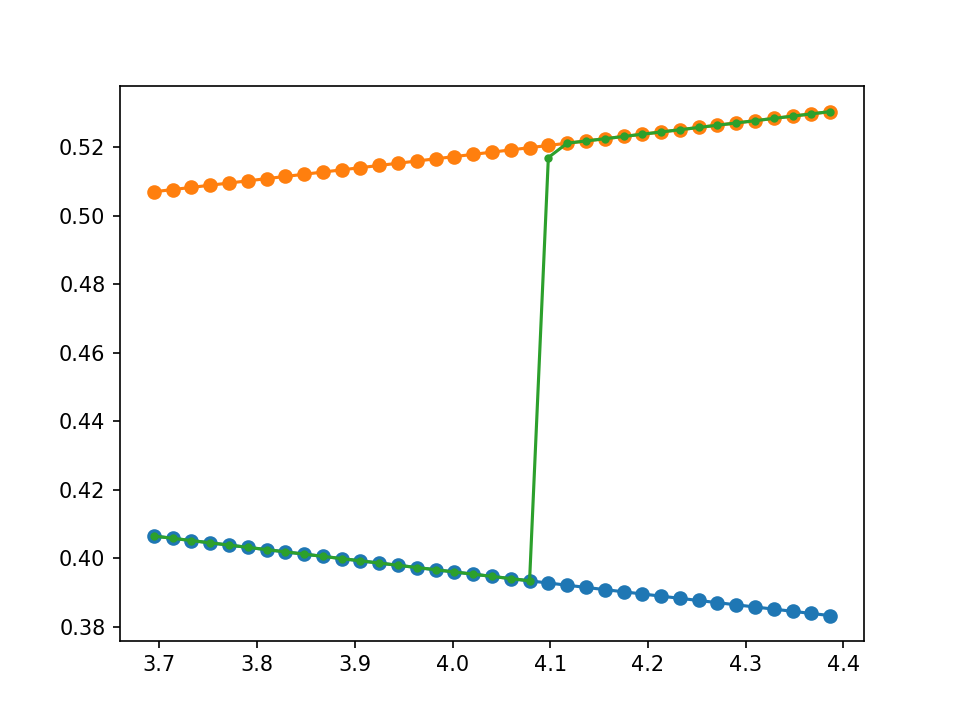

<IPython.core.display.Javascript object>


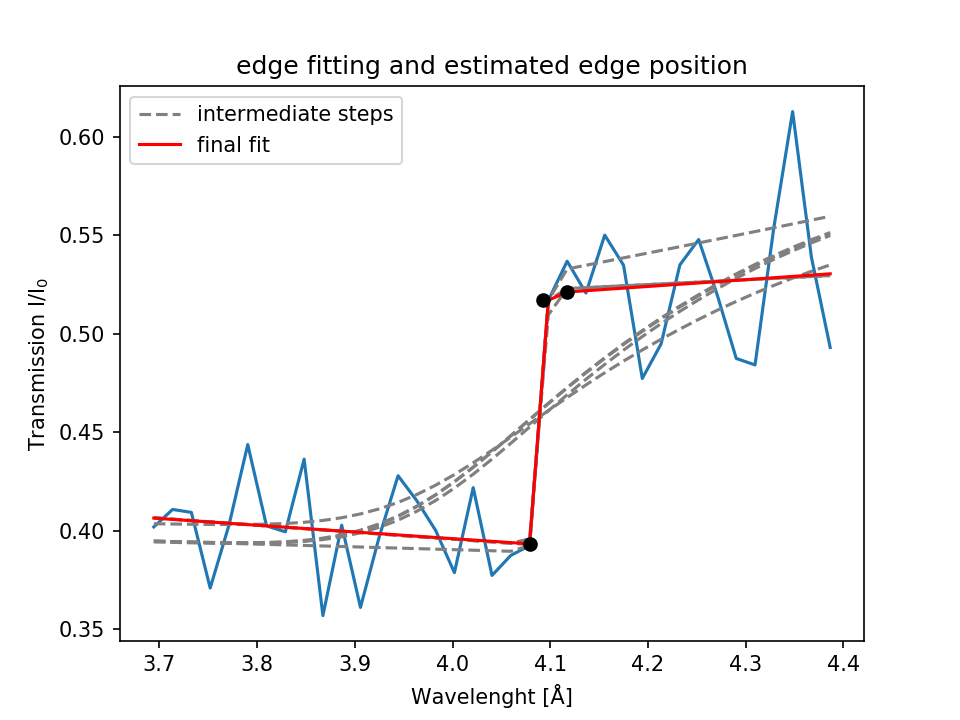

CPU times: user 297 ms, sys: 4.31 ms, total: 302 ms
Wall time: 288 ms


In [123]:
%%time
myrange =[]
myrange.append(find_nearest(mylambda_bin, 3.7))
myrange.append(find_nearest(mylambda_bin, 4.4))
print(myrange)

plt.figure()
plt.plot(mylambda_bin[myrange[0]:myrange[1]], sp[myrange[0]:myrange[1]])

est_sigma = 0.1
est_alpha = 0.1
est_pos = find_nearest(mylambda_bin, 4.05)
print(est_pos)
ris = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(sp, myrange, mylambda_bin, est_pos, est_sigma, est_alpha, True, False, False, True)
# t_edg = ris['t0']
# print(t_edg)

<IPython.core.display.Javascript object>


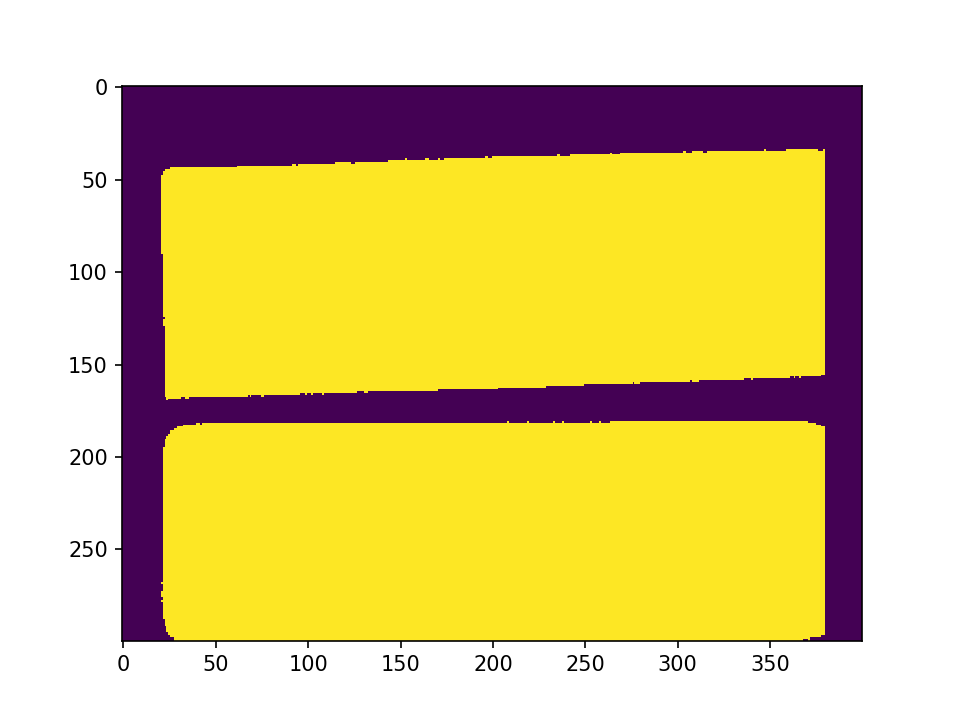

86740


<IPython.core.display.Javascript object>


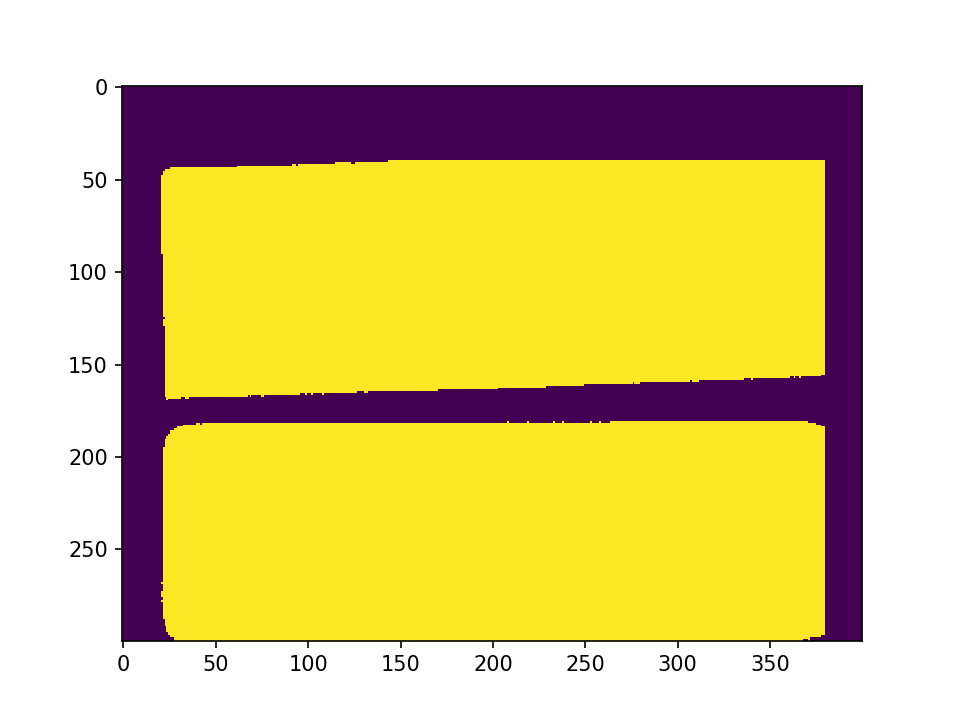

<IPython.core.display.Javascript object>


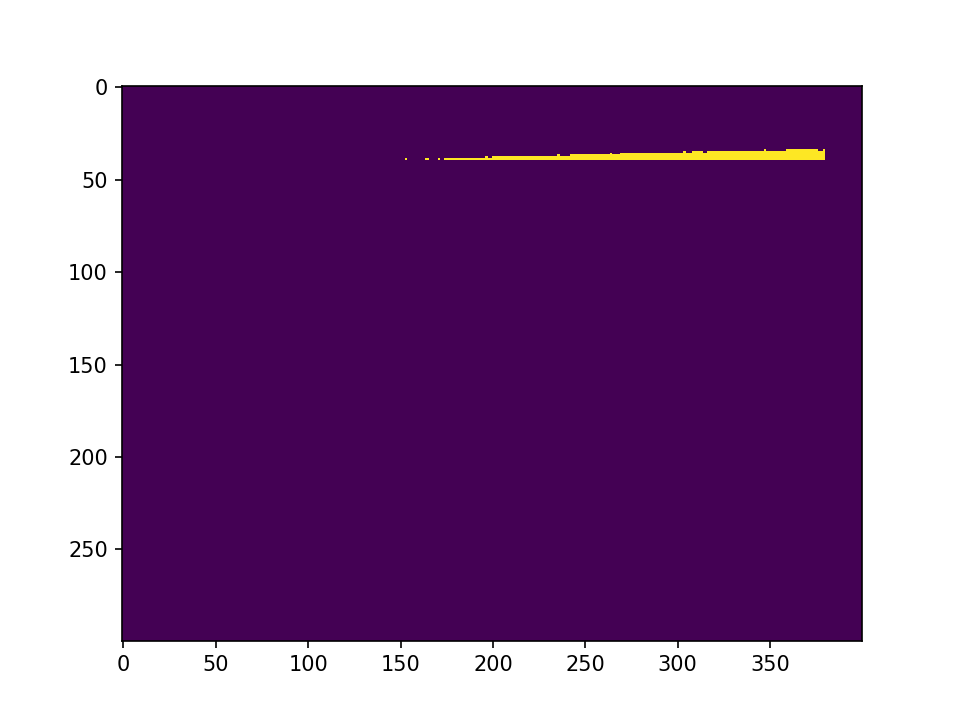

In [89]:
mymask = trans_image[:,:,70]<0.5

mymask[:28,:] = False
mymask[:,380:] = False

plt.figure()
plt.imshow(mymask)
print(np.sum(mymask))

othermask = trans_image[:,:,70]<0.5
othermask[:40,:] = False
othermask[:,380:] = False
plt.figure()
plt.imshow(othermask)

# plt.figure()
# plt.imshow(othermask!=mymask)

little_mask = othermask!=mymask
plt.figure()
plt.imshow(little_mask)

18
[ 0 36]
37 2 37
[[Model]]
    Model(BraggEdgeExponential)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 30
    # data points      = 36
    # variables        = 7
    chi-square         = 0.00763221
    reduced chi-square = 2.6318e-04
    Akaike info crit   = -290.520306
    Bayesian info crit = -279.435673
[[Variables]]
    t0:                 4.07866988 +/- 130065.582 (3188921.54%) (init = 4.076611)
    alpha:              8.8868e-04 +/- 18052.1685 (2031355958.19%) (init = 0.006558039)
    sigma:              3.9901e-04 +/- 166744.834 (41789615059.24%) (init = 0.0005425104)
    a1:                 1.99170465 +/- 1.43849538 (72.22%) (init = 1.138005)
    a2:                -0.04536292 +/- 0.33896800 (747.24%) (init = 0.1535839)
    a5:                -4.37054858 +/- 2.12084849 (48.53%) (init = -3.880652)
    a6:                 1.30690091 +/- 0.52813569 (40.41%) (init = 1.203881)
    bool_transmission: -inf (fixed)
[[Correlations]] (unreported co

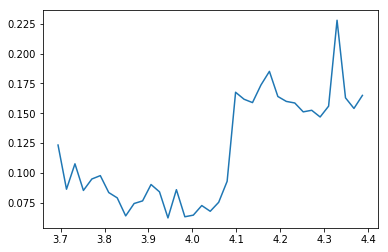

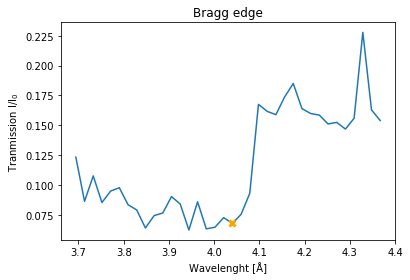

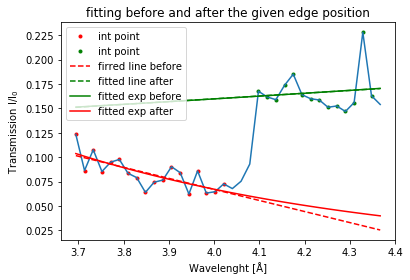

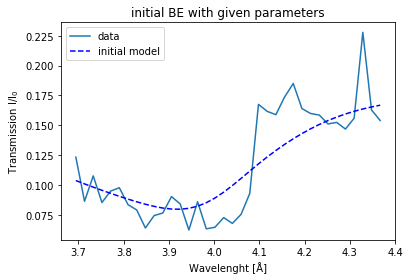

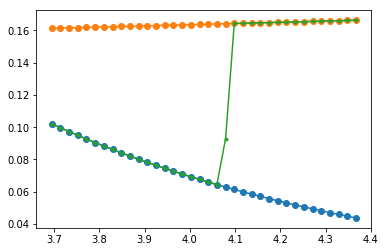

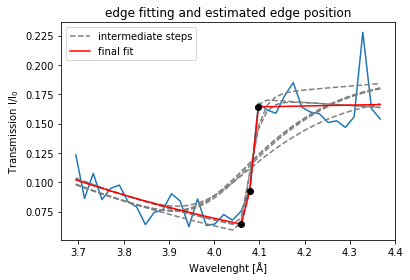

106
[88, 125]
[[Model]]
    Model(BraggEdgeExponential)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 26
    # data points      = 37
    # variables        = 7
    chi-square         = 0.00763418
    reduced chi-square = 2.5447e-04
    Akaike info crit   = -299.983401
    Bayesian info crit = -288.706975
[[Variables]]
    t0:                 4.07855978 +/- 15750.9720 (386189.56%) (init = 4.076283)
    alpha:              8.8506e-04 +/- 26892.9752 (3038556174.03%) (init = 0.007669497)
    sigma:              2.0660e-04 +/- 62396.2248 (30201102063.85%) (init = 0.0001408172)
    a1:                 1.94456283 +/- 1.28224664 (65.94%) (init = 0.9776328)
    a2:                -0.03410872 +/- 0.30144455 (883.78%) (init = 0.1905023)
    a5:                -4.32338756 +/- 1.99813278 (46.22%) (init = -3.757007)
    a6:                 1.29564172 +/- 0.49946988 (38.55%) (init = 1.176675)
    bool_transmission: -inf (fixed)
[[Correlations]] (unreported correla

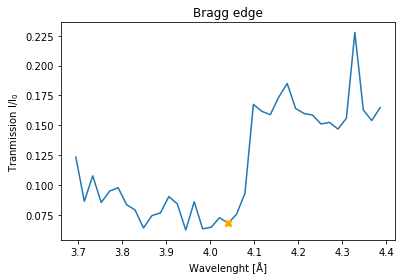

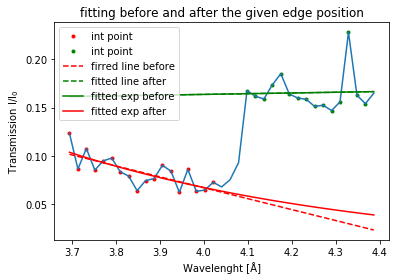

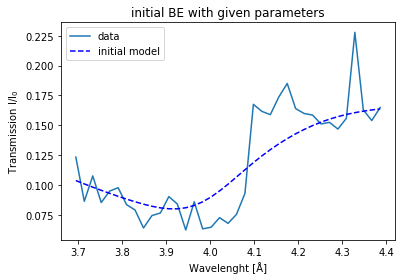

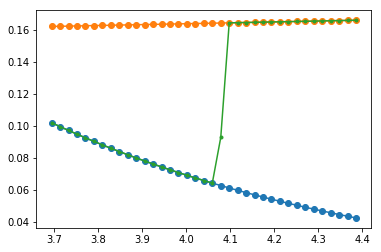

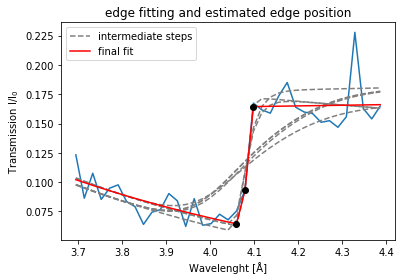

CPU times: user 1.81 s, sys: 28.2 ms, total: 1.84 s
Wall time: 1.83 s


In [48]:
%%time

est_sigma = 0.08
est_alpha = 0.08
est_pos = find_nearest(mylambda_bin[myrange[0]:myrange[1]], 4.05)
print(est_pos)
small_range = np.array([0, myrange[1]-myrange[0]-1])
small_lambda = mylambda_bin[myrange[0]:myrange[1]]
print(small_range)
print(len(small_lambda), len(small_range), len(sp[myrange[0]:myrange[1]]))

plt.figure()
plt.plot(small_lambda,sp[myrange[0]:myrange[1]] )

AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(sp[myrange[0]:myrange[1]], small_range, small_lambda, est_pos, est_sigma, est_alpha, True, False, False, True)

est_pos = find_nearest(mylambda_bin, 4.05)
print(est_pos)
print(myrange)
AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(sp, myrange, mylambda_bin, est_pos, est_sigma, est_alpha, True, False, False, True)


edge_position = np.zeros(np.shape(mymask))
edge_width = np.zeros(np.shape(mymask))



# print(np.shape(edge_position))

# for i in range(0, np.shape(mymask)[0]):
    
#     for j in range(0, np.shape(mymask)[1]):
        
#         if (mymask[i,j]):
# #             print(i,j,' ciao')
#             # extract the signal
#             mysignal = np.zeros(myrange[1]-myrange[0])
            
    
#             for ind in range(myrange[0],myrange[1]):
#                 mysignal[ind-myrange[0]] = np.median(trans_image[i,j,ind])
            
#             try:
#                 edge_fit = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(mysignal, small_range, small_lambda, est_pos, est_sigma, est_alpha, False, False, False, True)

#                 edge_position[i,j] = edge_fit['t0']
#                 if (len(edge_fit['pos_extrema'])==2):
#                     edge_width[i,j] = small_lambda[edge_fit['pos_extrema'][1]]-small_lambda[edge_fit['pos_extrema'][0]]
#                 else:
#                     edge_width[i,j]=-2.0
#             except:
#                 print("Unexpected error at :", i, j)
#                 edge_position[i,j]= -2.0
#                 edge_width[i,j]=-2.0
                

                    


    

<IPython.core.display.Javascript object>


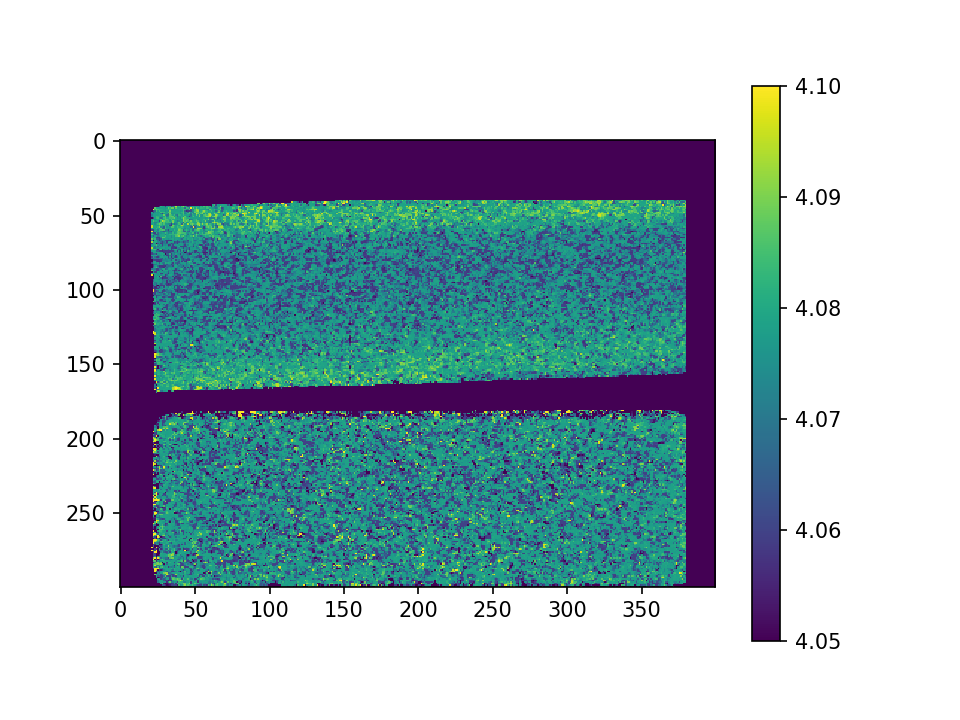

In [64]:

test = np.load('edge_position.npy')
plt.figure()
plt.imshow(test,vmin=4.05, vmax=4.10)
plt.colorbar()

<IPython.core.display.Javascript object>


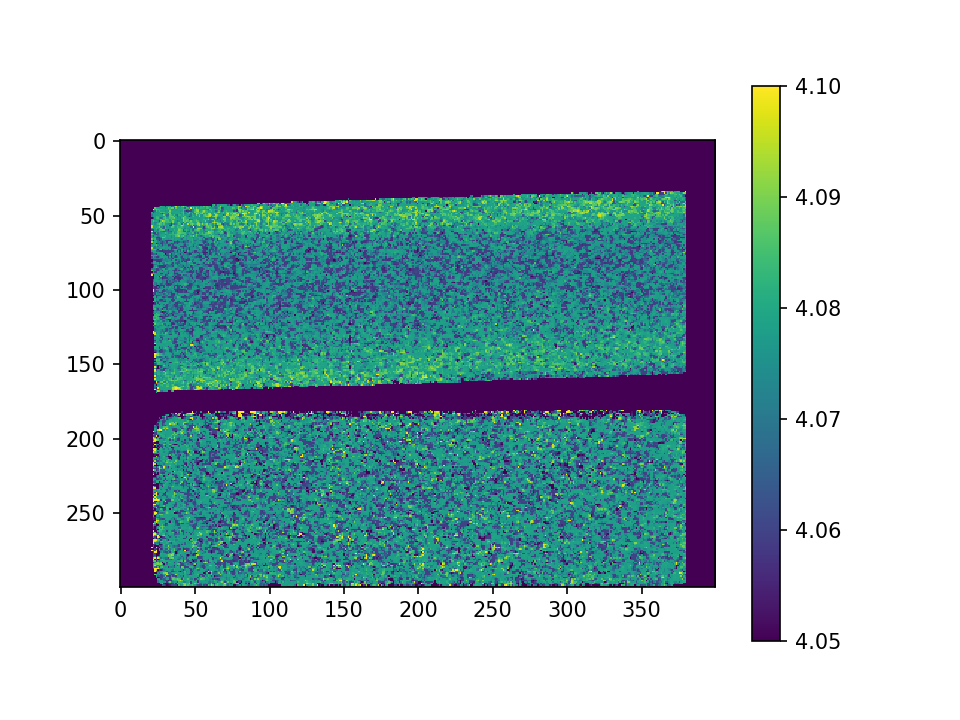

In [94]:
test_little = np.load('edge_position_little.npy')
fits.writeto('edge_pos.fits',test)
plt.figure()
plt.imshow(test_little+test,vmin=4.05, vmax=4.10)
plt.colorbar()

np.save("edge_position_tot.npy", test_little+test)

In [95]:
EP = np.load("edge_position_tot.npy")

<IPython.core.display.Javascript object>


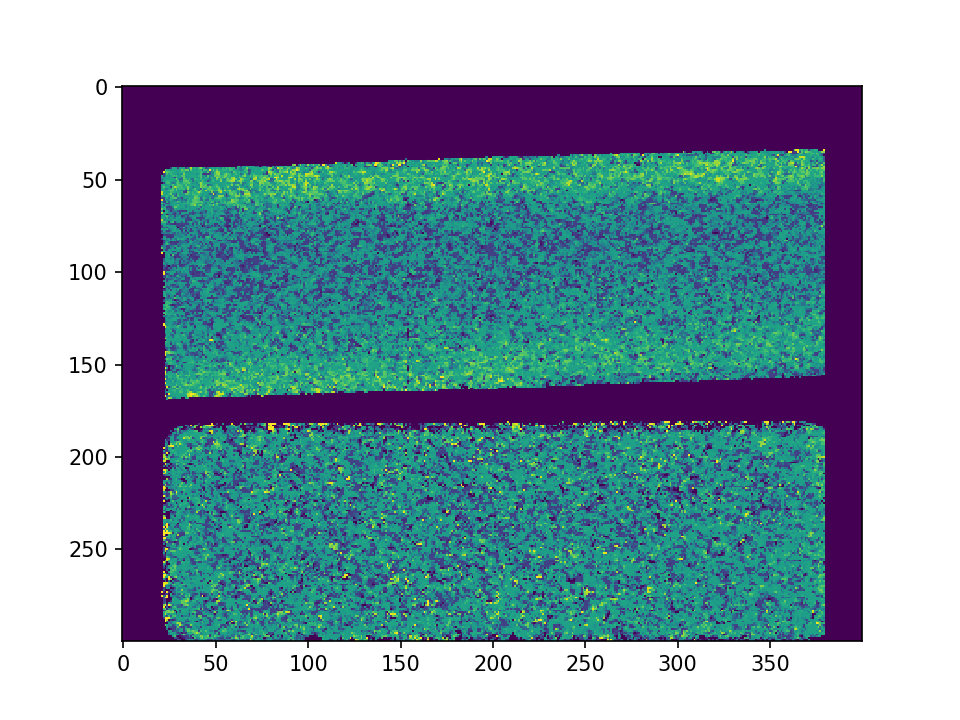

In [96]:
plt.figure()
plt.imshow(EP,vmin=4.05, vmax=4.10)

In [98]:
sum(sum(n < 0 for n in EP))

46

In [143]:
#     t0:                 4.07855978 +/- 15750.9720 (386189.56%) (init = 4.076283)
#     alpha:              8.8506e-04 +/- 26892.9752 (3038556174.03%) (init = 0.007669497)
#     sigma:              2.0660e-04 +/- 62396.2248 (30201102063.85%) (init = 0.0001408172)
#     a1:                 1.94456283 +/- 1.28224664 (65.94%) (init = 0.9776328)
#     a2:                -0.03410872 +/- 0.30144455 (883.78%) (init = 0.1905023)
#     a5:                -4.32338756 +/- 1.99813278 (46.22%) (init = -3.757007)
#     a6:                 1.29564172 +/- 0.49946988 (38.55%) (init = 1.176675)
        
est_alpha = 0.1
est_sigma = 0.1
a1 = 1.94456283
a2 = -0.03410872
a5 = -4.32338756
a6 = 1.29564172
est_pos = find_nearest(mylambda_bin[myrange[0]:myrange[1]], 4.07)

missing_edges = np.zeros(np.shape(mymask))
print(est_pos)

print(myrange)
print(small_range)

# 37,254

# for ind in range(myrange[0],myrange[1]):
#     mysignal[ind-myrange[0]] = np.median(trans_image[37,254,ind])

# plt.figure()
# plt.plot(small_lambda, mysignal)

# edge_fit = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(mysignal, small_range, small_lambda, est_pos, est_sigma, est_alpha, True, False, False, True)

for i in range(0, np.shape(mymask)[0]):
    
    for j in range(0, np.shape(mymask)[1]):
        
        if (EP[i,j]==-2):
            print(i,j,' ciao')
            # extract the signal
            mysignal = np.zeros(myrange[1]-myrange[0])
            
    
            for ind in range(myrange[0],myrange[1]):
                mysignal[ind-myrange[0]] = np.median(trans_image[i,j,ind])
            
            try:
                edge_fit = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(mysignal, small_range, small_lambda, est_pos, est_sigma, est_alpha, False, False, False, True)

                missing_edges[i,j] = edge_fit['t0']
#                 if (len(edge_fit['pos_extrema'])==2):
#                     edge_width[i,j] = small_lambda[edge_fit['pos_extrema'][1]]-small_lambda[edge_fit['pos_extrema'][0]]
#                 else:
#                     edge_width[i,j]=-2.0
            except:
                print("Unexpected error at :", i, j)
                missing_edges[i,j]= -2.0
#                 edge_width[i,j]=-2.0
                

20
[88, 125]
[ 0 36]
37 254  ciao
43 219  ciao
47 205  ciao
53 187  ciao
53 339  ciao
56 240  ciao
66 136  ciao
76 79  ciao
82 359  ciao
88 21  ciao
89 357  ciao
90 138  ciao
101 299  ciao
106 199  ciao
117 117  ciao
125 193  ciao
153 342  ciao
154 84  ciao
161 182  ciao
163 188  ciao
163 189  ciao
164 89  ciao
181 265  ciao
Unexpected error at : 181 265
181 320  ciao
182 225  ciao
182 251  ciao
213 294  ciao
216 140  ciao
217 91  ciao
217 135  ciao
222 35  ciao
223 68  ciao
224 32  ciao
238 23  ciao
244 228  ciao
Unexpected error at : 244 228
246 336  ciao
250 154  ciao
250 255  ciao
261 222  ciao
262 257  ciao
263 88  ciao
264 67  ciao
284 215  ciao
287 361  ciao
291 247  ciao
298 371  ciao


<IPython.core.display.Javascript object>


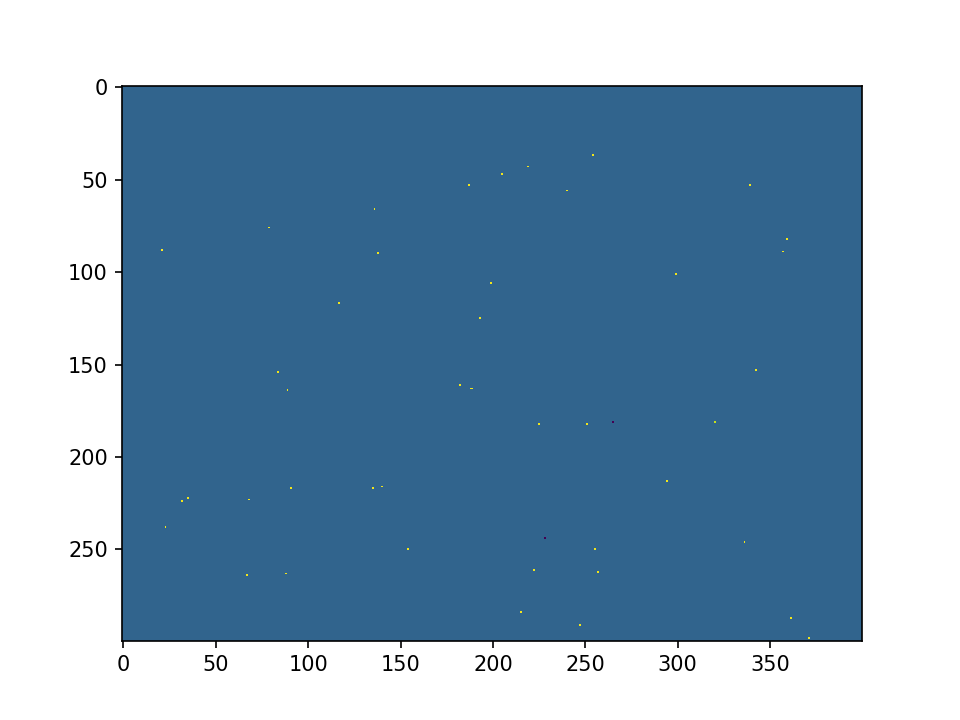

In [144]:
plt.figure()
plt.imshow(missing_edges)

In [147]:
est_alpha = 0.09
est_sigma = 0.09
a1 = 1.94456283
a2 = -0.03410872
a5 = -4.32338756
a6 = 1.29564172
est_pos = find_nearest(mylambda_bin[myrange[0]:myrange[1]], 4.05)

# missing_edges = np.zeros(np.shape(mymask))
print(est_pos)

print(myrange)
print(small_range)



for i in range(0, np.shape(mymask)[0]):
    
    for j in range(0, np.shape(mymask)[1]):
        
        if (missing_edges[i,j]==-2):
            print(i,j,' ciao')
            # extract the signal
            mysignal = np.zeros(myrange[1]-myrange[0])
            
    
            for ind in range(myrange[0],myrange[1]):
                mysignal[ind-myrange[0]] = np.median(trans_image[i,j,ind])
            
            try:
                edge_fit = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(mysignal, small_range, small_lambda, est_pos, est_sigma, est_alpha, False, False, False, True)

                missing_edges[i,j] = edge_fit['t0']
#                 if (len(edge_fit['pos_extrema'])==2):
#                     edge_width[i,j] = small_lambda[edge_fit['pos_extrema'][1]]-small_lambda[edge_fit['pos_extrema'][0]]
#                 else:
#                     edge_width[i,j]=-2.0
            except:
                print("Unexpected error at :", i, j)
                missing_edges[i,j]= -2.0
#                 edge_width[i,j]=-2.0

18
[88, 125]
[ 0 36]
181 265  ciao


<IPython.core.display.Javascript object>


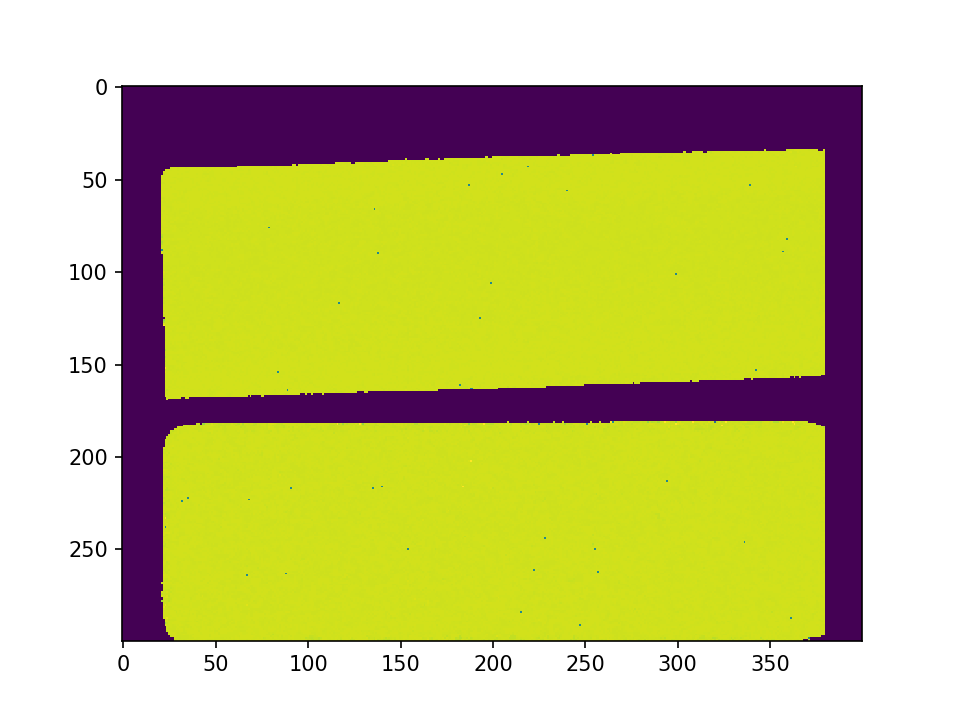

In [150]:
plt.figure()
plt.imshow(missing_edges+EP)

In [156]:
updated_EP = np.zeros(np.shape(mymask))

for i in range(0, np.shape(mymask)[0]):
    for j in range(0, np.shape(mymask)[1]):
        if (EP[i,j]!=-2):
            updated_EP[i,j]= EP[i,j]
        else:
            updated_EP[i,j]= missing_edges[i,j]
# updated_EP = EP[EP!=-2]
# updated_EP = missing_edges[EP==-2]

<IPython.core.display.Javascript object>


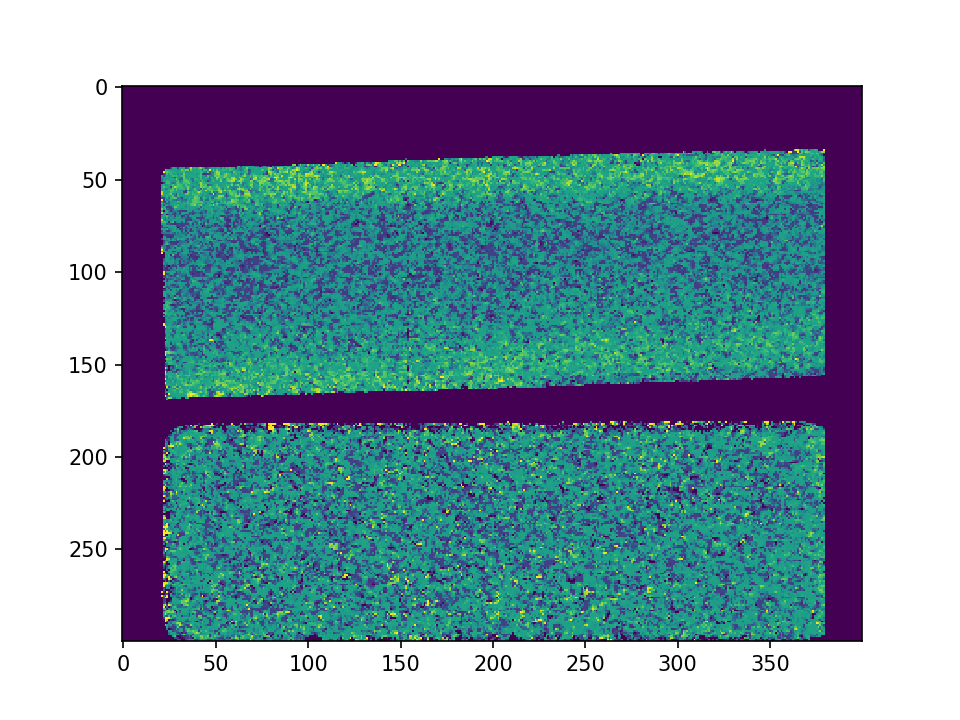

In [158]:
plt.figure()
plt.imshow(updated_EP,vmin=4.05, vmax=4.10)

In [159]:
np.save('edge_positions_all.npy', updated_EP)

In [160]:
fits.writeto('edge_pos_all.fits',updated_EP)